###### Week 19 - Class Notes

Unsupervised learning
- goal: find patterns in unlabeled data
- two main approaches
    - clustering
        - K-means
        - heirarchical
        - grid based, density based, etc
    - dimensionality reduction
        - linear
            - Principal component analysis - PCA
            - Singular value decomposition - SVD, used for sparse data
            - linear dicriminant
        - non-linear
            - isomap embedding

why use unsupervised learning rather than labeling data
- find natural patters, may not know what you want to predict
- can be too expensive or cumbersome to label
- can prevent bias in some situations

Clustering
- a process that looks to find inherent groupings in data
- K-means 
    - first randomly assigns a mean value for each of the K clusters
    - then, all values are assigned to the closest mean
    - finally, the means of those clusters are recalculates based on the actual values 
    - repeat the process until the mean is closest to the mean of the values in the clusters

K-means in action:
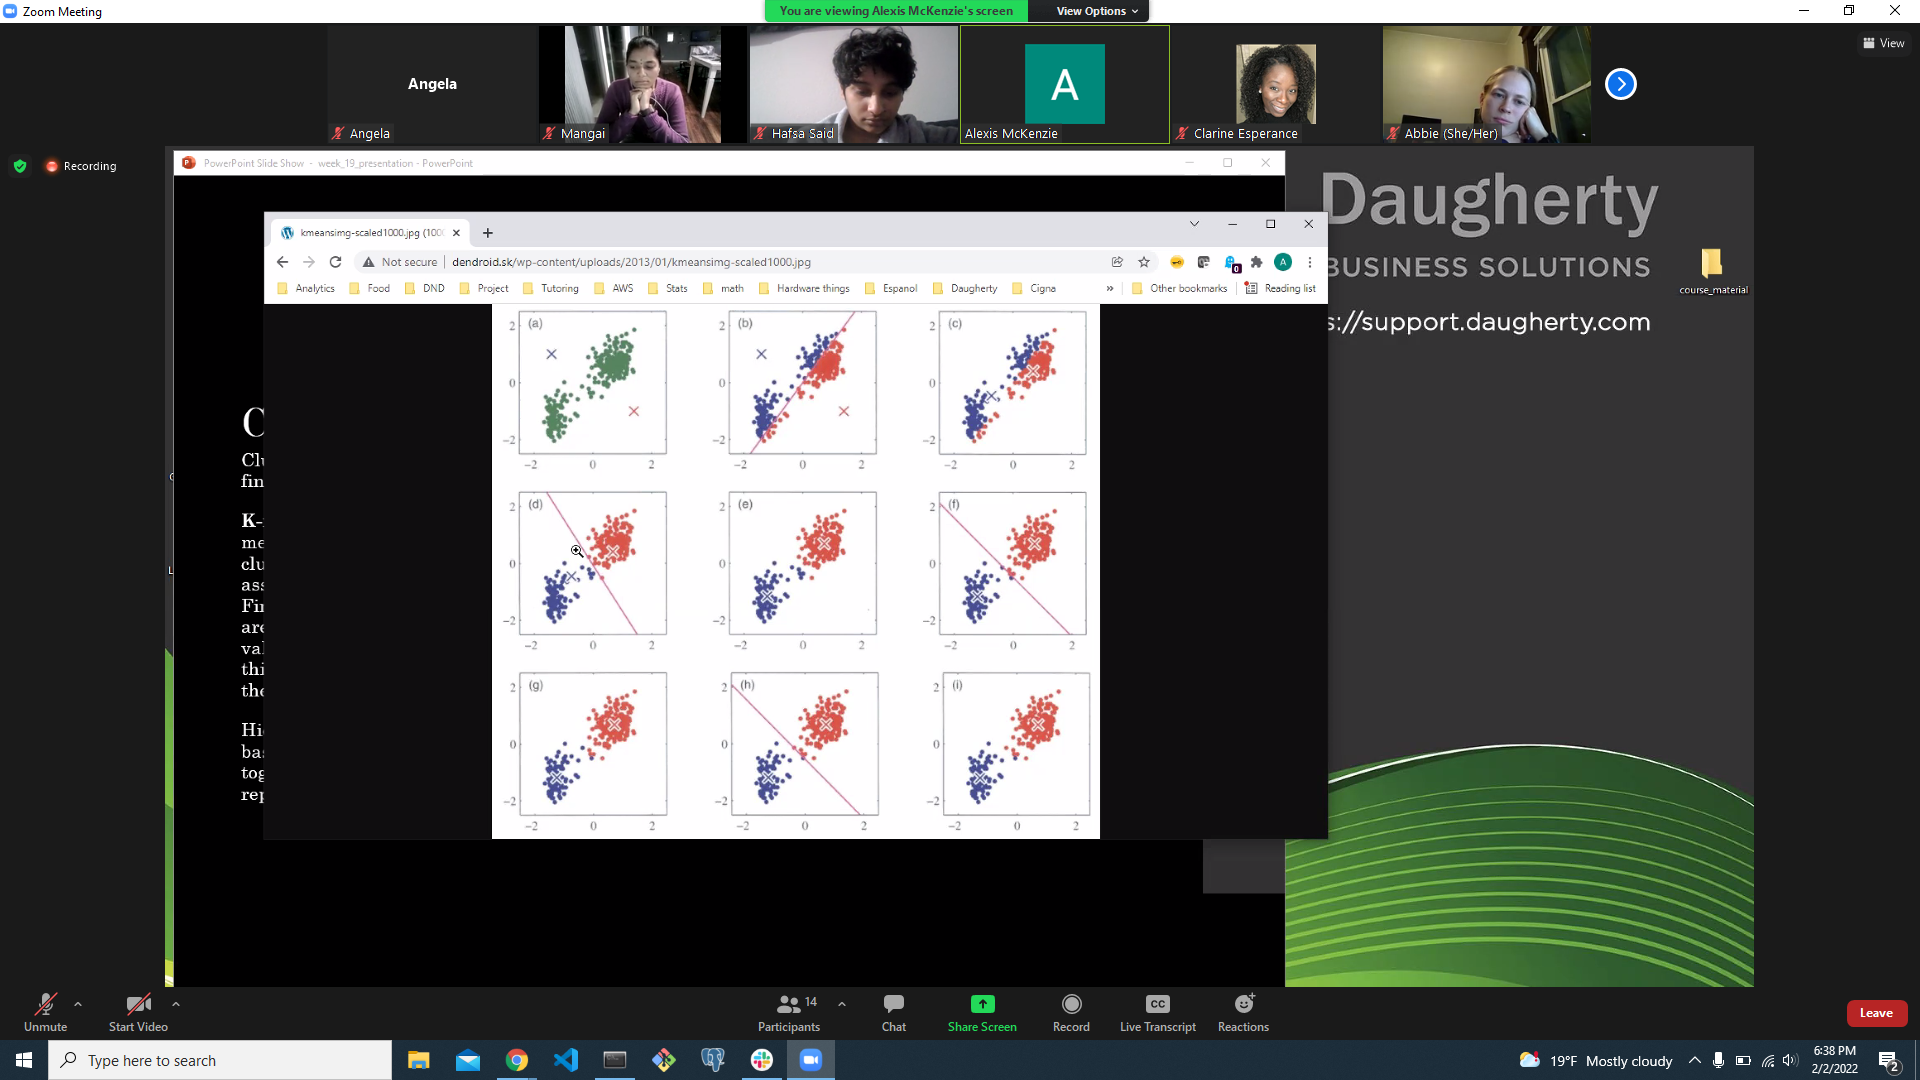

- heirarchical clustering takes a tree based structure and groups data together based on proximity to repeatedly smaller groups (can be top down or bottom up)

Finding Ideal Number of CLusters
partitioning(K-means)
- measure of intertia, sum of squares (most common)
- distortion, average of squared distance
- elbow method - curve of within cluster sum of squares (WSS)
- gap method - tried to maximize intra-cluster range
- average silhouette method - determines how well each value fits in each cluster
    - similar to gap, more mathematically robust

heirarchical
- find maximum distrance in dendrogram
    - represents the maximum distance (y-axis) between clusters
    - number of clusters is number of clusters intersected at max distance

Dimensionality Reduction
- goal is to reduse the dimensionaity of dataset

# Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
crime_df = pd.read_csv("../Datasets/USArrests.csv")
crime_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Murder')

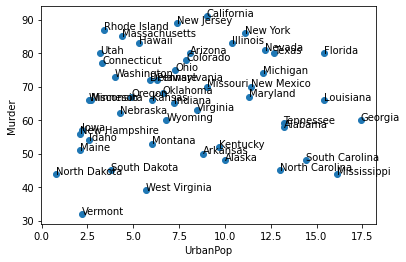

In [4]:
X = crime_df.drop('State', axis=1)
y = crime_df['State']

plt.scatter(X['Murder'], X['UrbanPop'])

for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i], X['UrbanPop'][i]))

plt.xlabel('UrbanPop')
plt.ylabel('Murder')

# not very useful, really need to cluster, especially as dimensions increase

In [5]:
inertias = []
distortions = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #calculate distortion
    #average of squared distance from cluster center to data points
    #cdist() - calculate the distance from each point to cluster centers
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

    distortion = sum(np.min(cdist(X,model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]
    # add to list
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

C:\Users\aspen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method with Distortion')

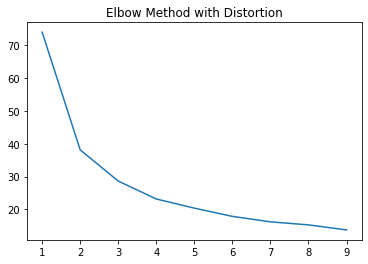

In [6]:
plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

#slightly unclear if it's 2, 3, or 4 - there are multiple approaches to take if it is unclear

Text(0.5, 1.0, 'Elbow Method with Inertia')

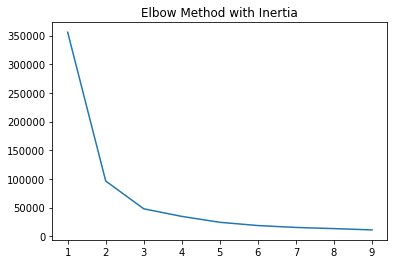

In [7]:
plt.plot(range(1,10), inertias)
plt.title('Elbow Method with Inertia')

#much clearer that 3 is the correct number of clusters

# Hierarchical

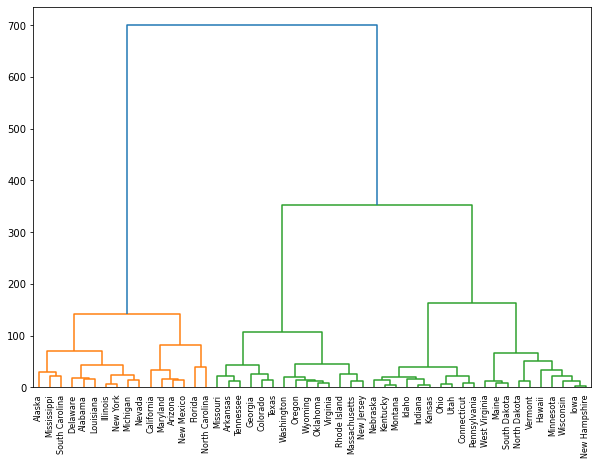

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X,'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked,labels=list(y))
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

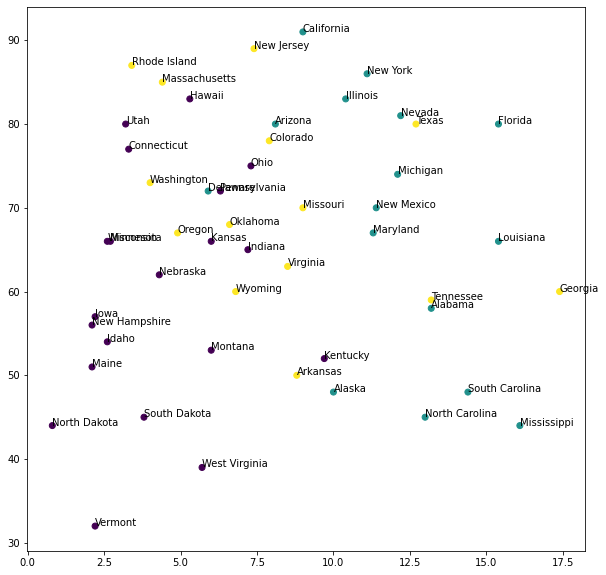

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(X['Murder'], X['UrbanPop'], c=cluster.labels_)

for i, txt in enumerate(y):
    plt.annotate(txt, (X['Murder'][i], X['UrbanPop'][i]))

plt.show()

In [12]:
#display in table form
crime_df['cluster'] = cluster.labels_
crime_df.tail()

,State,Murder,Assault,UrbanPop,Rape,cluster
45,Virginia,8.5,156,63,20.7,2
46,Washington,4.0,145,73,26.2,2
47,West Virginia,5.7,81,39,9.3,0
48,Wisconsin,2.6,53,66,10.8,0
49,Wyoming,6.8,161,60,15.6,2


# Dimensionality Reduction

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("../Datasets/diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#LogisticRegression

clr = LogisticRegression(random_state=42).fit(X_train, y_train)

#predict
y_predicted = clr.predict(X_test)

#accuracy
clr.score(X_test, y_test)

0.7359307359307359

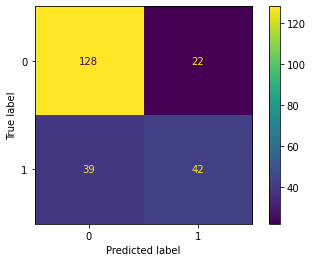

In [15]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clr, X_test, y_test)

In [16]:
from sklearn.decomposition import TruncatedSVD

In [17]:
svd = TruncatedSVD(n_components=6)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

clr = LogisticRegression(random_state=42).fit(X_train_svd, y_train)

clr.score(X_test_svd, y_test)

0.70995670995671

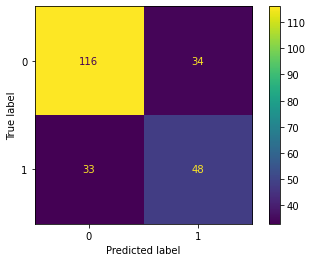

In [18]:
plot_confusion_matrix(clr, X_test_svd, y_test)